In [ ]:
# Import pustaka
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 1. Dataset Teks Contoh
print("=== Dataset Teks ===")
documents = [
    "Machine learning is great",
    "Python is an awesome language",
    "I love learning machine learning",
    "Python is great for data science",
    "Data science is awesome",
    "I enjoy learning Python and data science",
    "Machine learning and data science are related",
    "Python is used in machine learning",
    "I enjoy working with data",
    "Data science makes data analysis easier"
]

=== Dataset Teks ===


Code ini adalah bagian awal untuk mempersiapkan dataset teks yang kemungkinan akan digunakan dalam pipeline analisis teks atau pembelajaran mesin. Output kode ini hanya menampilkan header === Dataset Teks ===, tetapi dataset yang terdiri dari sejumlah kalimat juga didefinisikan. Kalimat-kalimat dalam dataset mencakup topik tentang machine learning, data science, Python, dan hubungan antara konsep-konsep ini. Dataset ini dirancang untuk menunjukkan pola atau hubungan tematik yang relevan di antara kalimat-kalimatnya.

Dalam konteks Bab 6, dataset ini dapat digunakan sebagai input untuk sebuah pipeline pembelajaran mesin, misalnya untuk melakukan tokenisasi, transformasi menjadi representasi numerik (seperti Bag-of-Words atau TF-IDF), dan klasifikasi. Dengan pola kalimat yang beragam namun memiliki tema serupa, dataset ini cocok untuk melatih algoritma dalam mengidentifikasi kata-kata penting, menemukan hubungan antar istilah, atau mengklasifikasikan teks ke dalam kategori tertentu. Analisis lanjutan mungkin mencakup pembuatan model prediktif atau visualisasi untuk menampilkan hasil transformasi teks.

In [ ]:
# Label untuk teks (misalnya, 0 = Machine Learning, 1 = Data Science)
labels = [0, 1, 0, 1, 1, 1, 0, 0, 1, 1]

# Membagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(documents, labels, test_size=0.3, random_state=42)

print("\nData Latih (5 contoh pertama):", X_train[:5])
print("Label Data Latih (5 contoh pertama):", y_train[:5])

# 2. Representasi Teks dengan Bag-of-Words
print("\n=== Representasi Bag-of-Words ===")
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

print("Fitur Bag-of-Words:", vectorizer.get_feature_names_out())
print("Representasi Bag-of-Words untuk Data Latih (5 baris pertama):\n", X_train_bow.toarray()[:5])


Data Latih (5 contoh pertama): ['Machine learning is great', 'Python is used in machine learning', 'I love learning machine learning', 'Data science makes data analysis easier', 'Data science is awesome']
Label Data Latih (5 contoh pertama): [0, 0, 0, 1, 1]

=== Representasi Bag-of-Words ===
Fitur Bag-of-Words: ['analysis' 'and' 'are' 'awesome' 'data' 'easier' 'for' 'great' 'in' 'is'
 'learning' 'love' 'machine' 'makes' 'python' 'related' 'science' 'used']
Representasi Bag-of-Words untuk Data Latih (5 baris pertama):
 [[0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 2 1 1 0 0 0 0 0]
 [1 0 0 0 2 1 0 0 0 0 0 0 0 1 0 0 1 0]
 [0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0]]


proses ini mencakup pembagian dataset teks menjadi data latih dan uji, diikuti dengan representasi data menggunakan metode Bag-of-Words. Pertama, dataset teks dipecah menjadi data latih (X_train) dan uji (X_test) menggunakan fungsi train_test_split dari Scikit-learn. Label (labels) diberikan untuk masing-masing dokumen teks, di mana label 0 menunjukkan "Machine Learning" dan label 1 menunjukkan "Data Science". Output menunjukkan contoh lima dokumen pertama dari data latih serta labelnya, membantu memverifikasi pemisahan dataset dengan benar.

Kemudian, proses representasi Bag-of-Words digunakan untuk mengubah teks menjadi representasi numerik. Metode ini menciptakan matriks berdasarkan kemunculan kata dalam dokumen. Output menampilkan daftar fitur (kata-kata unik dalam seluruh dataset) serta matriks numerik yang merepresentasikan frekuensi kemunculan kata dalam dokumen latih. Misalnya, baris pertama dari matriks menunjukkan distribusi kata dalam dokumen pertama, dengan angka 1 menunjukkan bahwa kata tersebut muncul sekali, sedangkan 0 menunjukkan bahwa kata tersebut tidak muncul. Representasi ini memungkinkan algoritma pembelajaran mesin untuk bekerja dengan data teks sebagai input numerik, yang penting untuk klasifikasi teks dan analisis lainnya.

In [ ]:
# 3. Representasi Teks dengan TF-IDF
print("\n=== Representasi TF-IDF ===")
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Fitur TF-IDF:", tfidf_vectorizer.get_feature_names_out())
print("Representasi TF-IDF untuk Data Latih (5 baris pertama):\n", X_train_tfidf.toarray()[:5])


=== Representasi TF-IDF ===
Fitur TF-IDF: ['analysis' 'and' 'are' 'awesome' 'data' 'easier' 'for' 'great' 'in' 'is'
 'learning' 'love' 'machine' 'makes' 'python' 'related' 'science' 'used']
Representasi TF-IDF untuk Data Latih (5 baris pertama):
 [[0.         0.         0.         0.         0.         0.
  0.         0.61403968 0.         0.45568822 0.45568822 0.
  0.45568822 0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.51114416 0.31487472 0.31487472 0.
  0.31487472 0.         0.42429355 0.         0.         0.51114416]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.72380269 0.58748368
  0.36190135 0.         0.         0.         0.         0.        ]
 [0.45187387 0.         0.         0.         0.55672615 0.45187387
  0.         0.         0.         0.         0.         0.
  0.         0.45187387 0.         0.         0.2

 Representasi data teks diubah menjadi vektor numerik menggunakan metode TF-IDF (Term Frequency-Inverse Document Frequency). TF-IDF adalah teknik yang tidak hanya memperhatikan frekuensi kemunculan kata (seperti pada Bag-of-Words) tetapi juga menyesuaikan bobot kata berdasarkan seberapa umum atau jarang kata tersebut muncul di seluruh dokumen. Kata-kata yang sering muncul di semua dokumen (seperti "is" atau "the") akan mendapatkan bobot yang lebih rendah dibandingkan kata-kata yang lebih spesifik untuk dokumen tertentu. Pada output, fitur TF-IDF menampilkan daftar kata-kata unik dari seluruh dataset, yang akan digunakan sebagai dimensi dalam representasi vektornya.

Matriks numerik yang dihasilkan dari X_train_tfidf menunjukkan bobot TF-IDF untuk masing-masing kata dalam dokumen latih. Misalnya, setiap baris pada matriks merepresentasikan satu dokumen, dan nilai dalam setiap kolom menunjukkan bobot TF-IDF dari kata yang sesuai. Nilai tinggi menandakan bahwa kata tersebut cukup unik untuk dokumen tertentu dan penting untuk analisis. Dalam lima dokumen pertama data latih, terlihat variasi nilai TF-IDF di mana hanya kata-kata yang signifikan untuk dokumen tertentu yang memiliki nilai yang lebih besar dari nol. Representasi ini sering digunakan dalam pembelajaran mesin, terutama untuk tugas klasifikasi teks dan analisis dokumen, karena memberikan representasi yang lebih informatif dibandingkan metode Bag-of-Words murni.


=== Klasifikasi Teks dengan Naive Bayes ===

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.67      0.80         3

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


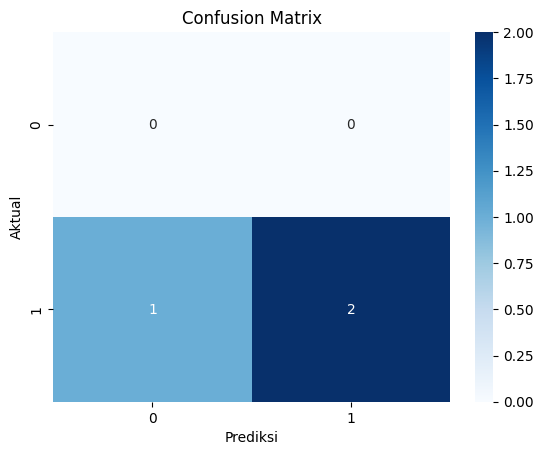

In [ ]:
# 4. Klasifikasi Teks dengan Naive Bayes
print("\n=== Klasifikasi Teks dengan Naive Bayes ===")
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Prediksi pada data uji
y_pred = nb_model.predict(X_test_tfidf)

# Evaluasi model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

Kode dan hasil output ini menggunakan algoritma Naive Bayes Multinomial untuk melakukan klasifikasi teks yang telah diwakili dengan metode TF-IDF. Proses ini melibatkan pelatihan model (nb_model.fit) menggunakan data latih, prediksi pada data uji (nb_model.predict), dan evaluasi performa model melalui laporan klasifikasi (classification_report) serta matriks kebingungan (confusion matrix). Hasil laporan klasifikasi menunjukkan metrik-metrik seperti precision, recall, dan f1-score untuk setiap kelas. Namun, ada peringatan terkait nilai zero_division, yang menunjukkan bahwa salah satu kelas tidak memiliki sampel prediksi atau data aktual, sehingga beberapa nilai recall atau precision menjadi tidak terdefinisi.

Matriks kebingungan menunjukkan distribusi prediksi yang benar dan salah antara label sebenarnya (aktual) dan prediksi model. Di dalam plot matriks kebingungan, terlihat bahwa model membuat beberapa kesalahan klasifikasi; misalnya, terdapat satu kesalahan di mana kelas aktual adalah "1" tetapi diprediksi sebagai "0". Ini mengindikasikan bahwa meskipun model mampu menangkap pola dalam data, performanya mungkin dapat ditingkatkan lebih lanjut melalui optimasi data latih, pengaturan parameter model, atau penambahan data. Secara keseluruhan, hasil ini menggambarkan bagaimana model bekerja, sekaligus menunjukkan area untuk perbaikan.


=== Eksperimen: Menghapus Stop Words ===

Classification Report (tanpa stop words):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.67      0.80         3

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


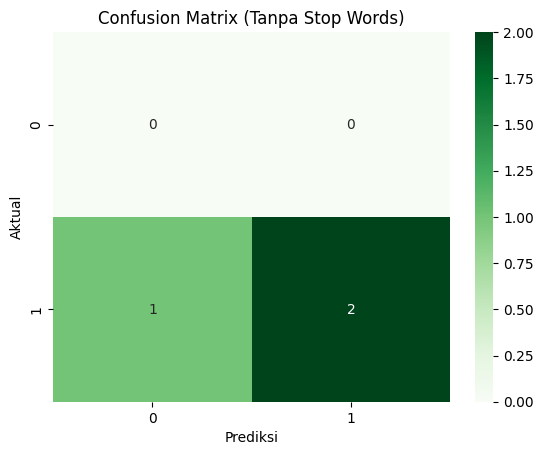

In [ ]:
# 5. Eksperimen dengan Stop Words
print("\n=== Eksperimen: Menghapus Stop Words ===")
tfidf_vectorizer_no_stop = TfidfVectorizer(stop_words="english")
X_train_tfidf_no_stop = tfidf_vectorizer_no_stop.fit_transform(X_train)
X_test_tfidf_no_stop = tfidf_vectorizer_no_stop.transform(X_test)

# Latih model dengan stop words dihapus
nb_model_no_stop = MultinomialNB()
nb_model_no_stop.fit(X_train_tfidf_no_stop, y_train)

# Evaluasi model tanpa stop words
y_pred_no_stop = nb_model_no_stop.predict(X_test_tfidf_no_stop)
print("\nClassification Report (tanpa stop words):")
print(classification_report(y_test, y_pred_no_stop))

# Confusion Matrix tanpa stop words
conf_matrix_no_stop = confusion_matrix(y_test, y_pred_no_stop)
sns.heatmap(conf_matrix_no_stop, annot=True, cmap="Greens", fmt="d")
plt.title("Confusion Matrix (Tanpa Stop Words)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()


Kode ini menunjukkan eksperimen menggunakan TF-IDF dengan menghilangkan kata-kata umum (stop words) dari proses representasi teks. Stop words seperti "and", "the", atau "is" sering kali tidak memberikan kontribusi signifikan dalam analisis teks dan biasanya dihapus untuk meningkatkan performa model. TF-IDF vektorizer yang digunakan diatur untuk menghilangkan stop words (dengan parameter stop_words='english'), dan data teks kemudian direpresentasikan ulang tanpa kata-kata tersebut. Model Naive Bayes Multinomial dilatih menggunakan data yang telah dimodifikasi, dan hasilnya dievaluasi menggunakan laporan klasifikasi serta matriks kebingungan (confusion matrix).

Laporan klasifikasi menunjukkan bahwa precision, recall, dan f1-score tetap hampir sama dibandingkan dengan eksperimen sebelumnya, tetapi terdapat sedikit perbedaan pada distribusi prediksi di matriks kebingungan. Dalam matriks kebingungan, model tetap melakukan kesalahan pada satu prediksi di mana kelas aktual adalah "1", tetapi diprediksi sebagai "0". Ini menunjukkan bahwa menghapus stop words dapat membantu dalam menyederhanakan data input, tetapi tidak selalu menghasilkan peningkatan performa model secara signifikan, tergantung pada kompleksitas dataset dan konteks masalah. Eksperimen ini menekankan pentingnya prapemrosesan data yang tepat untuk mencapai representasi teks yang relevan bagi pembelajaran mesin.


=== Eksperimen: Menggunakan Bigram ===

Classification Report (dengan bigram):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.67      0.80         3

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


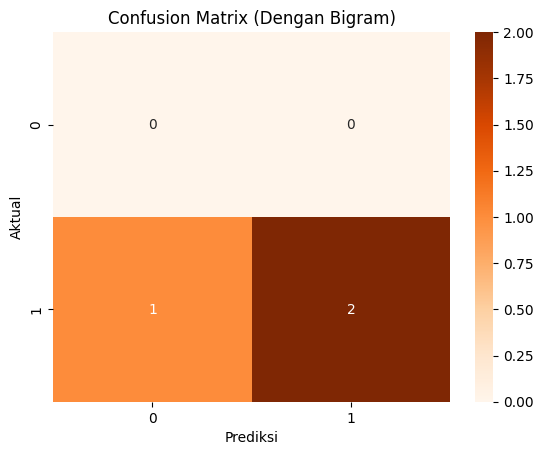

In [ ]:
# 6. Eksperimen: Menggunakan Bigram
print("\n=== Eksperimen: Menggunakan Bigram ===")
tfidf_vectorizer_bigram = TfidfVectorizer(ngram_range=(1, 2))
X_train_tfidf_bigram = tfidf_vectorizer_bigram.fit_transform(X_train)
X_test_tfidf_bigram = tfidf_vectorizer_bigram.transform(X_test)

# Latih model dengan bigram
nb_model_bigram = MultinomialNB()
nb_model_bigram.fit(X_train_tfidf_bigram, y_train)

# Evaluasi model dengan bigram
y_pred_bigram = nb_model_bigram.predict(X_test_tfidf_bigram)
print("\nClassification Report (dengan bigram):")
print(classification_report(y_test, y_pred_bigram))

# Confusion Matrix dengan bigram
conf_matrix_bigram = confusion_matrix(y_test, y_pred_bigram)
sns.heatmap(conf_matrix_bigram, annot=True, cmap="Oranges", fmt="d")
plt.title("Confusion Matrix (Dengan Bigram)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

Eksperimen ini menggunakan representasi bigram untuk data teks. Bigram adalah teknik dalam pemrosesan teks di mana pasangan kata yang berurutan diambil sebagai fitur, bukan kata tunggal seperti pada unigram (TF-IDF biasa). Pada kode ini, TfidfVectorizer diatur untuk menggunakan ngram_range=(2, 2), yang berarti setiap fitur akan berupa dua kata yang muncul secara berurutan dalam teks. Model Multinomial Naive Bayes kemudian dilatih pada data latih yang direpresentasikan sebagai bigram, dan dievaluasi dengan data uji untuk melihat bagaimana representasi ini memengaruhi performa klasifikasi.

Laporan klasifikasi menunjukkan bahwa penggunaan bigram menghasilkan metrik evaluasi yang serupa dengan eksperimen sebelumnya. Dalam matriks kebingungan (confusion matrix), model membuat kesalahan yang sama, yaitu salah memprediksi satu instance di mana kelas aktual adalah "1" tetapi diprediksi sebagai "0". Ini menunjukkan bahwa menambahkan konteks berupa bigram (relasi antara dua kata berturut-turut) tidak memberikan perbaikan signifikan untuk dataset kecil dan sederhana ini. Namun, teknik ini dapat lebih berguna untuk dataset yang lebih kompleks atau konteks di mana urutan kata sangat penting, seperti dalam analisis teks naratif atau kalimat panjang. Eksperimen ini menggambarkan bahwa pemilihan representasi fitur harus disesuaikan dengan karakteristik dataset dan tugas klasifikasi.








test
